In [13]:
from scipy.io import wavfile
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import correlate, find_peaks
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [87]:
fileName='C:/Users/kesav/OneDrive/Desktop/Academics/speech signal processing/Assignment-2/lataji_sng.wav'
samplerate,amp=wavfile.read(fileName)

length = amp.shape[0]
t = length / samplerate

In [88]:
frame_size = 0.025
frame_stride = 0.01

frame_length,frame_step = frame_size * samplerate, frame_stride * samplerate
frame_length=round(frame_length)

print(frame_length)

signal_length=len(amp)
print(signal_length)
num_frames =round(signal_length/frame_length)

frame_index=[0]
temp=0

for i in range(1,num_frames):
    temp+=frame_length
    frame_index.append(temp)
        


1102
665179


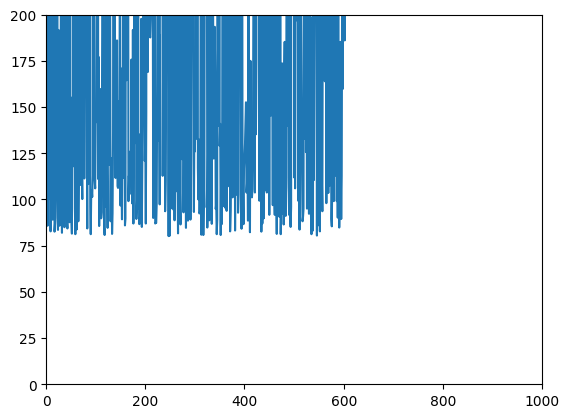

In [90]:
pitch=[]
for i in range(len(frame_index)):
    x=range(frame_index[i],frame_index[i]+frame_length)
    y=amp[frame_index[i]:frame_index[i]+frame_length]
    data=y
    data_length = data.shape[0]
    time = length / samplerate 
    window_size=200
    bounds=[20, data_length//2]
    pitch.append(detect_pitch(data, window_size,1,samplerate,bounds))



plt.ylim(0, 200)
plt.xlim(0,1000)
plt.plot(range(len(frame_index)),pitch)



In [80]:
def detect_pitch(data,w,t,sample_rate,bounds):
    ACF_values=[ACF(data,w,t,i) for i in range(*bounds)]
    sample=np.argmax(ACF_values)+bounds[0]
    return samplerate/sample
    

In [81]:
def ACF(f,w,t,lag):
    return np.sum(f[t:t+w]*f[lag+t:lag+t+w])
    